In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from pandas import read_csv
import seaborn as sns
import networkx as nx

In [2]:
df = pd.read_csv('BDGENERAL.csv', low_memory=False)
df1 = pd.read_csv('ZN.csv', low_memory=False)
NMOficinas = pd.Series(df.Oficina.unique())
NMZN = pd.Series(df1.Zona.unique())

In [3]:
df.Oficina=pd.factorize(df.Oficina)[0]
df1.Zona=pd.factorize(df1.Zona)[0]

In [4]:
df['ZN'] = df1['Zona']
Oficinas = pd.Series(df.Oficina.unique())
Sitio_Desembarque = pd.Series(df.Sitio_Desembarque.unique())

d = {}
for i in range(0,len(Oficinas)):
    dd = df.loc[df['Oficina'] == Oficinas[i]]
    DDD = pd.Series(dd.Sitio_Desembarque.unique())
    DDDD = [x for x in DDD if str(x) != 'nan']
    d[i] = DDDD
    
result = []
for i in range(0, len(Oficinas)):
    row = []
    for j in range(0, len(Oficinas)):
        row.append(len(set(d[i]) & set(d[j])))
    result.append(row)

ORT = pd.DataFrame(result, columns = Oficinas, index = Oficinas) 

In [5]:
ZN = pd.Series(df.ZN.unique())

d2 = {}
for i in range(0,len(ZN)):
    dd2 = df.loc[df['ZN'] == ZN[i]]
    DD2 = pd.Series(dd2.Sitio_Desembarque.unique())
    DDD2 = [x for x in DD2 if str(x) != 'nan']
    d2[i] = DDD2

result2 = []
for i in range(0, len(ZN)):
    row2 = []
    for j in range(0, len(ZN)):
        row2.append(len(set(d2[i]) & set(d2[j])))
    result2.append(row2)
    
ZRT = pd.DataFrame(result2, columns = ZN, index = ZN)    

    

In [6]:
i = 0
j = 0
k = 0
dr=pd.DataFrame([],columns=['a','b','c'], index=(range(0,(len(Oficinas)**2))))
while i < 144:
    
    while j < len(Oficinas):
        k=0
        while k < len(Oficinas):
            r=(len(set(d[j]) & set(d[k])))
            dr.a[i]=Oficinas[j]
            dr.b[i]=Oficinas[k]
            dr.c[i]=r
            k+=1
            i=i+1
        j+=1
    

In [7]:
dr2=dr[dr.a!=dr.b]


In [8]:
capEsc=df[df.Pesqueria=='ESCAMA ']
tabla1=df.groupby(['Oficina','Pesqueria'],as_index=False).sum().pivot('Oficina','Pesqueria').fillna(0)
Peso=tabla1.Peso
CaptOF=Peso['ESCAMA ']

In [9]:
dr3=dr2[dr2.c!=0].dropna()
dr3.drop('c', inplace=True, axis=1)
#dr3=dr2.dropna()
#dr3.drop('c', inplace=True, axis=1)

In [10]:
dr2

,a,b,c
1,0,1,3
2,0,2,4
3,0,3,8
4,0,4,4
5,0,5,0
...,...,...,...
138,11,6,2
139,11,7,0
140,11,8,0
141,11,9,0


In [11]:
dr4=dr3.transpose()

In [12]:
columnas=dr4.columns.tolist()

In [13]:
dr4.sort_values(by=columnas, inplace=True)

In [14]:
dr5=dr4.transpose().drop_duplicates()

In [15]:
dr4 = pd.DataFrame(np.sort(dr3.values,axis=1),columns=dr3.columns).drop_duplicates()

In [16]:
dr2.reset_index(inplace=True)
dr4.reset_index(inplace=True)

In [17]:
dc=['cc']
IC=[]
ICC=pd.DataFrame(IC,columns=dc)
for t in range(0,len(dr4)):
    A=dr4.a[t]
    B=dr4.b[t]
    for l in range(0,len(dr2)):
        AA=dr2.a[l]
        BB=dr2.b[l]
        if A==AA and B==BB:
            ICC.loc[t]=dr2.c[l]
        
        
            

In [18]:
dr4['c']=ICC

In [19]:
dr5=dr4

In [20]:
G=nx.Graph()

In [21]:
dr5.drop('c', inplace=True, axis=1)

In [22]:
dr5.drop('index', inplace=True, axis=1)

In [78]:
records = dr5.to_records(index=False)

conexiones = list(records)
PCO=(CaptOF/100000)

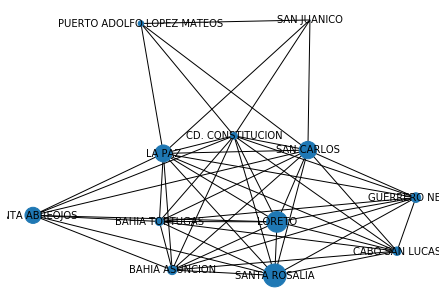

In [112]:
import networkx as nx
 
# Create a networkx graph object
my_graph = nx.Graph() 

# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph.add_edges_from(conexiones)

# Draw the resulting graph
nx.draw(my_graph,labels=NMOficinas,node_size=PCO, with_labels=True, font_size=10)


In [109]:
len(conexiones)

50